In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def create_dataset_00():
    Centers = [
        (0,0),
        (1,1),
        (2,1),
        (1,3)
    ]
    Centers = np.array(Centers)
    Points = []
    for center in Centers:
        var = np.array([[1,.5], [0,2]])
        Points.append(
            np.random.multivariate_normal(
                center,
                0.05*var,
                100
            )
        )
    Points = np.vstack(Points)
    return Points

In [8]:
Points = create_dataset_00()

/Users/zepuli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  app.launch_new_instance()


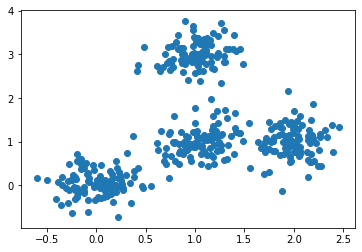

In [10]:
plt.scatter(Points[:,0], Points[:,1])
plt.show()

In [11]:
from random import random
def create_dataset_01():
    def line0(x):
        return (x, 10 - x**2 + (random() - 0.5))
    Points = []
    for _ in range(1000):
        x = 5*(random() - 0.5)
        point = line0(x)
        Points.append(point)
        
    def line1(x):
        return (x, 5*random() +((x)*(x-8)) + 5 )
    
    for _ in range(1000):
        x = 5*(random()+.1)
        point = line1(x)
        Points.append(point)
    
    Points = np.array(Points)
    return np.vstack(
        [
            Points, 
            np.random.multivariate_normal((5,5), [[1,0],[0,1]],100)
        ])

In [12]:
X = create_dataset_01()

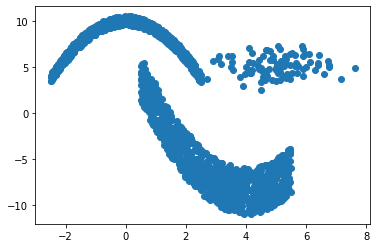

In [13]:
plt.scatter(X[:,0], X[:,1])
plt.show()

# Part 1

## KMeans

In [14]:
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering

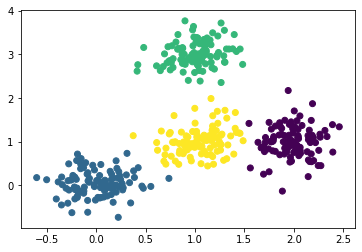

In [15]:
kmeans_model1 = KMeans(n_clusters=4)
y_pred1 = kmeans_model1.fit_predict(Points)

plt.scatter(Points[:, 0], Points[:, 1], c=y_pred1)
plt.show()

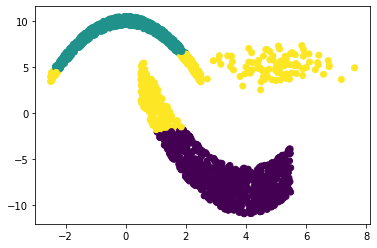

In [16]:
kmeans_model2 = KMeans(n_clusters=3)
y_pred2 = kmeans_model2.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred2)
plt.show()

## DBSCAN

In [17]:
db1 = DBSCAN(eps=0.335, min_samples=25).fit(Points)

core_samples_mask = np.zeros_like(db1.labels_, dtype=bool)
core_samples_mask[db1.core_sample_indices_] = True
labels = db1.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 15


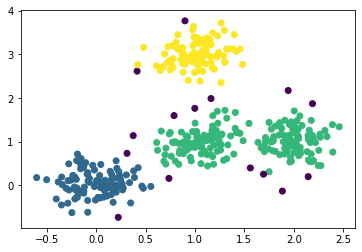

In [18]:
plt.scatter(Points[:, 0], Points[:, 1], c=db1.labels_)
plt.show()

In [19]:
db2 = DBSCAN(eps=0.82, min_samples=5).fit(X)

core_samples_mask = np.zeros_like(db2.labels_, dtype=bool)
core_samples_mask[db2.core_sample_indices_] = True
labels2 = db2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters2_ = len(set(labels2)) - (1 if -1 in labels2 else 0)
n_noise2_ = list(labels2).count(-1)

print('Estimated number of clusters: %d' % n_clusters2_)
print('Estimated number of noise points: %d' % n_noise2_)

Estimated number of clusters: 2
Estimated number of noise points: 3


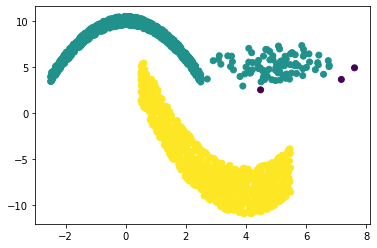

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=db2.labels_)
plt.show()

## SpectralClustering

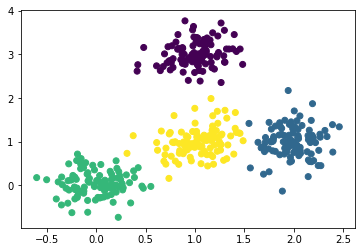

In [21]:
SCmodel1 = SpectralClustering(n_clusters=4,assign_labels="discretize",random_state=0).fit(Points)
plt.scatter(Points[:, 0], Points[:, 1], c=SCmodel1.labels_)
plt.show()

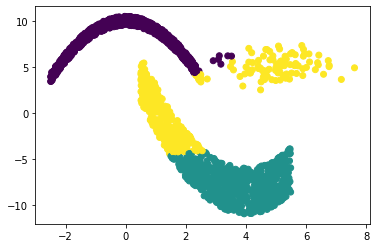

In [22]:
SCmodel2 = SpectralClustering(n_clusters=3,assign_labels="discretize",random_state=0).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=SCmodel2.labels_)
plt.show()

## TensorFlow

In [23]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.version.VERSION)
print(tf.keras.__version__)

2.0.0-beta1
2.2.4-tf


In [43]:
model = keras.Sequential([
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
model.fit(Points, y_pred1, epochs=10)

Train on 400 samples
Epoch 1/10
400/400 [==============================] - 0s 43us/sample - loss: 0.7212 - accuracy: 0.8025
Epoch 2/10
400/400 [==============================] - 0s 54us/sample - loss: 0.6907 - accuracy: 0.8200
Epoch 3/10
400/400 [==============================] - 0s 28us/sample - loss: 0.6596 - accuracy: 0.8275
Epoch 4/10
400/400 [==============================] - 0s 26us/sample - loss: 0.6282 - accuracy: 0.8675
Epoch 5/10
400/400 [==============================] - 0s 56us/sample - loss: 0.5973 - accuracy: 0.8825
Epoch 6/10
400/400 [==============================] - 0s 45us/sample - loss: 0.5671 - accuracy: 0.8875
Epoch 7/10
400/400 [==============================] - 0s 48us/sample - loss: 0.5373 - accuracy: 0.8975
Epoch 8/10
400/400 [==============================] - 0s 42us/sample - loss: 0.5087 - accuracy: 0.9025
Epoch 9/10
400/400 [==============================] - 0s 41us/sample - loss: 0.4813 - accuracy: 0.9050
Epoch 10/10
400/400 [==============================]